## Key Findings from Exploratory Data Analysis

This section summarizes the most important insights derived from exploratory analysis.
These findings are intended to guide downstream customer segmentation and predictive
modeling efforts, as well as inform potential business actions.

Key questions addressed:
- Which product categories drive the most revenue?
- How prevalent is repeat purchasing behavior?
- What patterns indicate opportunities for retention or growth?


In [2]:
# ============================================================================
# 1. IMPORT LIBRARIES AND LOAD CLEANED DATA
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_retail_sales.csv')

# Convert date columns to datetime
date_cols = ['Order_Date', 'Ship_Date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

print("=" * 80)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")

if 'Order_Date' in df.columns:
    print(
        f"Analysis Period: "
        f"{df['Order_Date'].min().date()} to {df['Order_Date'].max().date()}"
    )


EXPLORATORY DATA ANALYSIS (EDA)

Dataset Shape: (10000, 45)
Analysis Period: 2022-01-01 to 2023-02-21



UNIVARIATE ANALYSIS - NUMERICAL VARIABLES


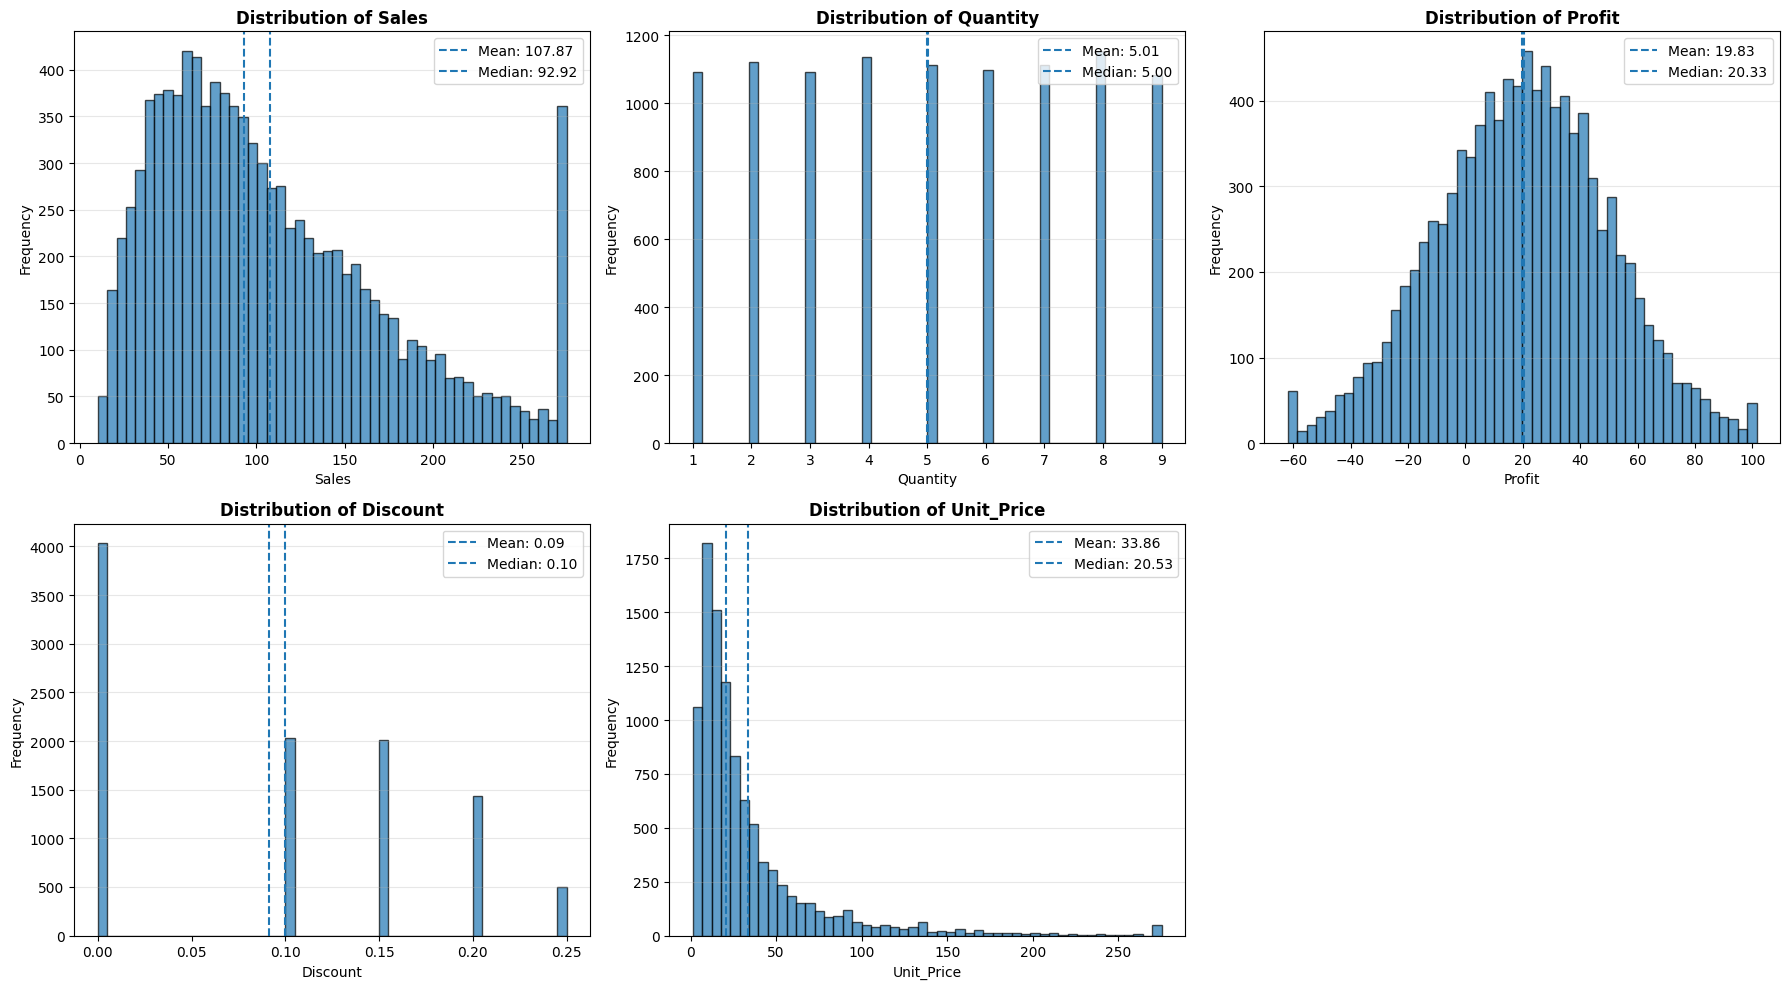

Saved: 05_numerical_distributions.png

Statistical Summary
          Sales  Quantity    Profit  Discount  Unit_Price
count  10000.00  10000.00  10000.00  10000.00    10000.00
mean     107.87      5.01     19.83      0.09       33.86
std       64.55      2.58     30.20      0.08       39.60
min       10.35      1.00    -61.87      0.00        1.36
25%       58.33      3.00     -0.61      0.00       11.11
50%       92.92      5.00     20.33      0.10       20.53
75%      145.13      7.00     40.22      0.15       39.13
max      275.33      9.00    101.47      0.25      275.33

Skewness and Kurtosis
Sales           Skewness: 0.89, Kurtosis: 0.15
Quantity        Skewness: -0.01, Kurtosis: -1.23
Profit          Skewness: -0.03, Kurtosis: -0.13
Discount        Skewness: 0.19, Kurtosis: -1.34
Unit_Price      Skewness: 2.99, Kurtosis: 11.27


In [3]:
# ============================================================================
# 2. UNIVARIATE ANALYSIS - NUMERICAL VARIABLES
# ============================================================================

import os

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS - NUMERICAL VARIABLES")
print("=" * 80)

# Ensure output directory exists
os.makedirs("../figures", exist_ok=True)

# Select numerical columns
numerical_cols = [col for col in numerical_cols if col in df.columns]


# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].axvline(
            df[col].mean(),
            linestyle='--',
            label=f"Mean: {df[col].mean():.2f}"
        )
        axes[idx].axvline(
            df[col].median(),
            linestyle='--',
            label=f"Median: {df[col].median():.2f}"
        )
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

# Remove unused subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig(
    "../figures/05_numerical_distributions.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

print("Saved: 05_numerical_distributions.png")

# Statistical summary
print("\nStatistical Summary")
print(df[numerical_cols].describe().round(2))

# Skewness and kurtosis
print("\nSkewness and Kurtosis")
for col in numerical_cols:
    print(
        f"{col:15s} "
        f"Skewness: {df[col].skew():.2f}, "
        f"Kurtosis: {df[col].kurtosis():.2f}"
    )




UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES


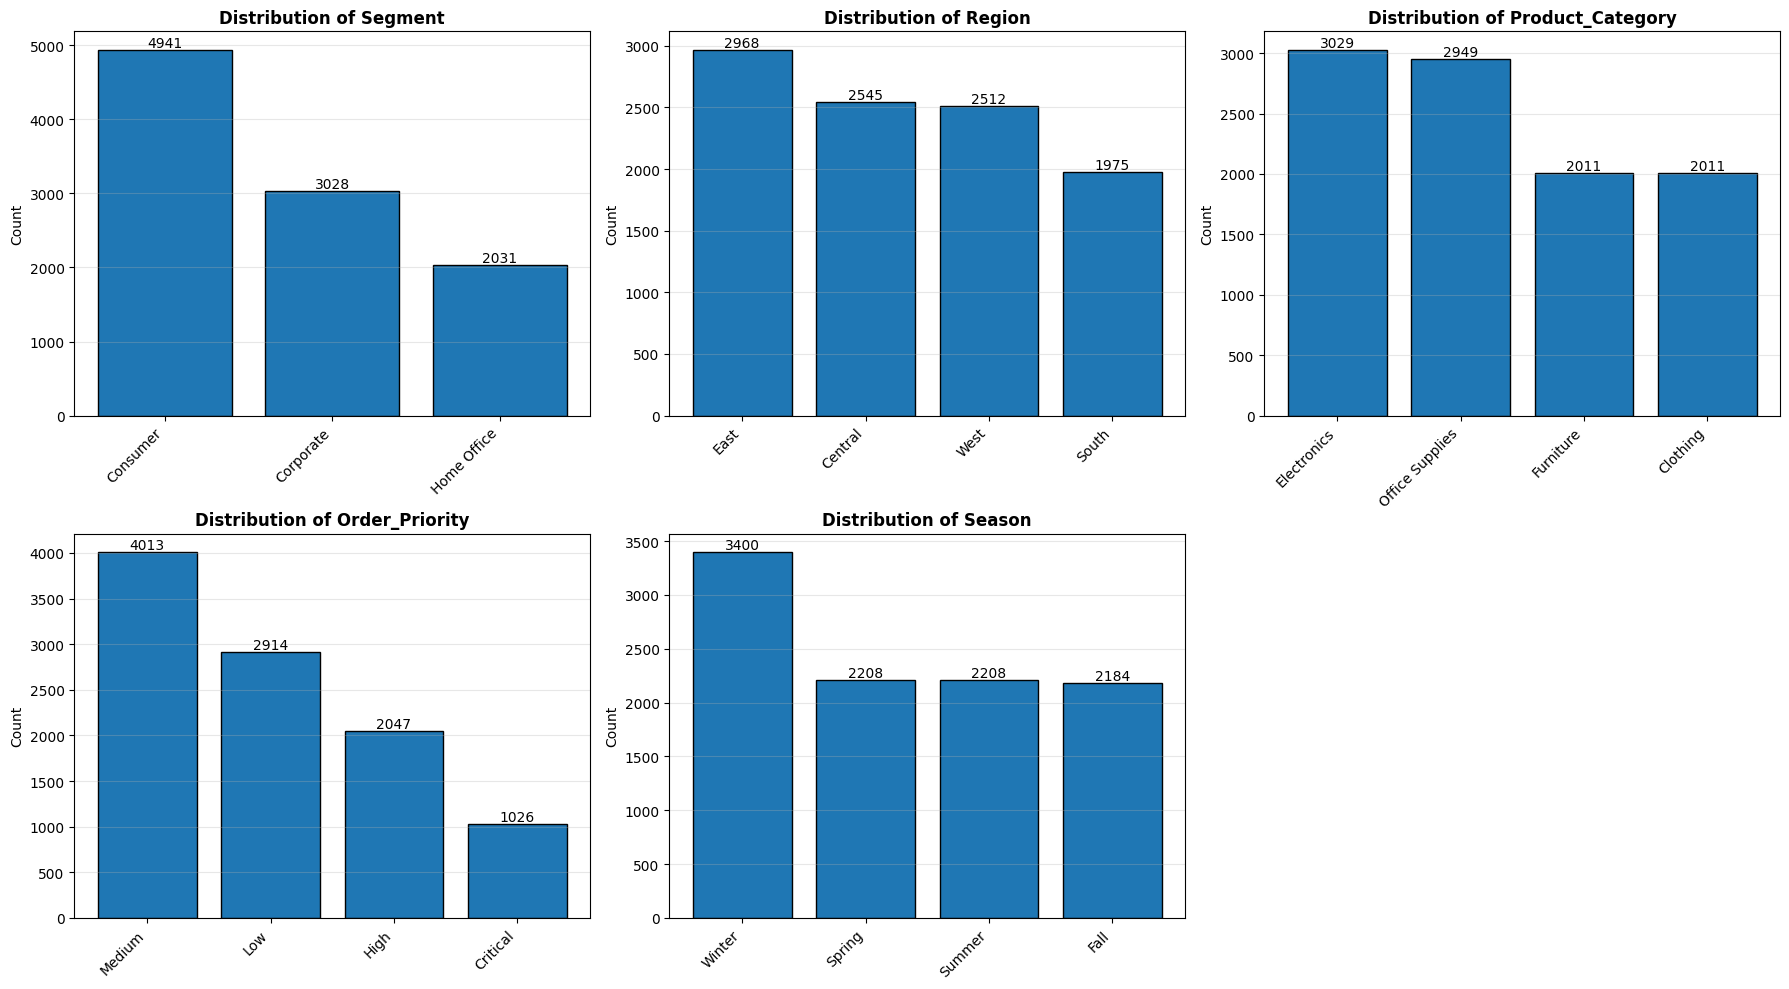

Saved: 06_categorical_distributions.png

Categorical Variable Counts

Segment
Segment
Consumer       4941
Corporate      3028
Home Office    2031
Name: count, dtype: int64

Region
Region
East       2968
Central    2545
West       2512
South      1975
Name: count, dtype: int64

Product_Category
Product_Category
Electronics        3029
Office Supplies    2949
Furniture          2011
Clothing           2011
Name: count, dtype: int64

Order_Priority
Order_Priority
Medium      4013
Low         2914
High        2047
Critical    1026
Name: count, dtype: int64

Season
Season
Winter    3400
Spring    2208
Summer    2208
Fall      2184
Name: count, dtype: int64


In [4]:
# ============================================================================
# 3. UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES
# ============================================================================

import os

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES")
print("=" * 80)

# Ensure output directory exists
os.makedirs("../figures", exist_ok=True)

# Select categorical columns
categorical_cols = [
    'Segment',
    'Region',
    'Product_Category',
    'Order_Priority',
    'Season'
]
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Create bar plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(
            value_counts.index.astype(str),
            value_counts.values,
            edgecolor='black'
        )
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_ylabel('Count')
        axes[idx].set_xticklabels(
            value_counts.index.astype(str),
            rotation=45,
            ha='right'
        )
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v, str(v), ha='center', va='bottom')

# Remove unused subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig(
    "../figures/06_categorical_distributions.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

print("Saved: 06_categorical_distributions.png")

# Print value counts
print("\nCategorical Variable Counts")
for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())




BIVARIATE ANALYSIS
                    Total_Sales   Avg_Sales  Order_Count
Product_Category                                        
Electronics       328422.713112  108.426119         3029
Office Supplies   321280.864068  108.945698         2949
Furniture         214958.032671  106.891115         2011
Clothing          214009.369624  106.419378         2011
Saved: 07_sales_by_category.html


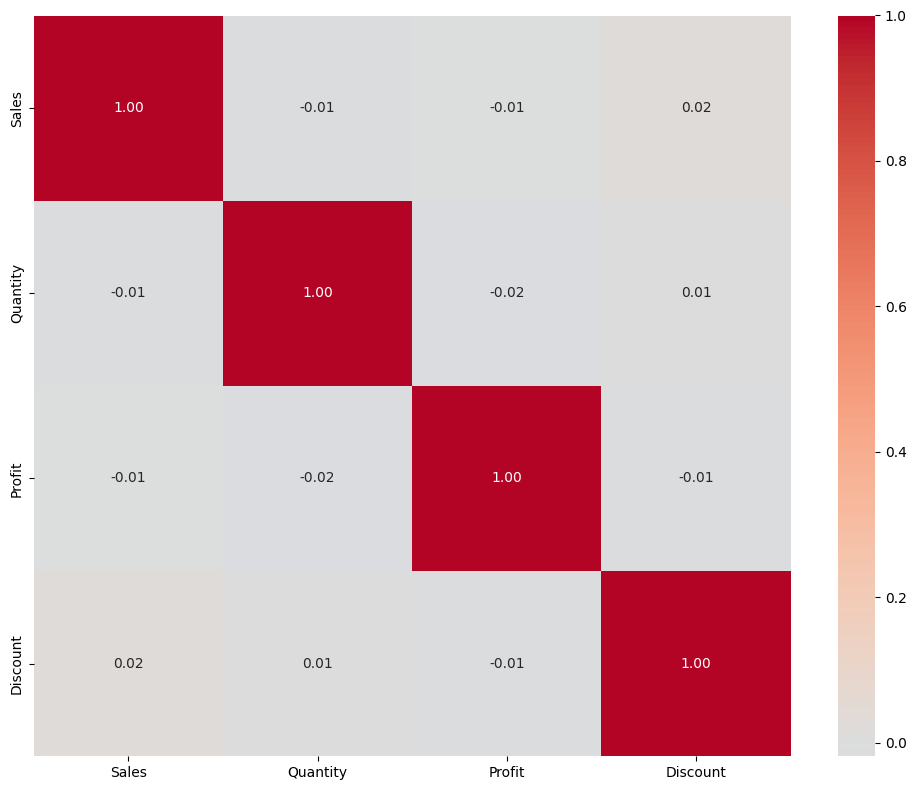

Saved: 09_correlation_matrix.png


In [5]:
# ============================================================================
# 4. BIVARIATE ANALYSIS
# ============================================================================

import os
os.makedirs("../figures", exist_ok=True)

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Sales by Product Category
if 'Product_Category' in df.columns and 'Sales' in df.columns:
    category_sales = (
        df.groupby('Product_Category')['Sales']
        .agg(['sum', 'mean', 'count'])
        .rename(columns={
            'sum': 'Total_Sales',
            'mean': 'Avg_Sales',
            'count': 'Order_Count'
        })
        .sort_values('Total_Sales', ascending=False)
    )
    print(category_sales)

    fig = px.bar(
        category_sales.reset_index(),
        x='Product_Category',
        y='Total_Sales',
        title='Total Sales by Product Category'
    )
    fig.write_html("../figures/07_sales_by_category.html")
    print("Saved: 07_sales_by_category.html")

# Correlation Matrix
numerical_cols = ['Sales', 'Quantity', 'Profit', 'Discount']
numerical_cols = [c for c in numerical_cols if c in df.columns]

corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.tight_layout()
plt.savefig("../figures/09_correlation_matrix.png", dpi=300)
plt.show()

print("Saved: 09_correlation_matrix.png")


In [6]:
# ============================================================================
# 5. TIME SERIES ANALYSIS
# ============================================================================

import os
os.makedirs("../figures", exist_ok=True)

print("\n" + "=" * 80)
print("TIME SERIES ANALYSIS")
print("=" * 80)

if 'Order_Date' in df.columns and 'Sales' in df.columns:
    df['YearMonth'] = df['Order_Date'].dt.to_period('M')
    monthly_sales = (
        df.groupby('YearMonth')['Sales']
        .sum()
        .reset_index()
    )
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

    fig = px.line(
        monthly_sales,
        x='YearMonth',
        y='Sales',
        title='Monthly Sales Trend'
    )
    fig.write_html("../figures/10_monthly_sales_trend.html")
    print("Saved: 10_monthly_sales_trend.html")



TIME SERIES ANALYSIS
Saved: 10_monthly_sales_trend.html



CUSTOMER BEHAVIOR ANALYSIS


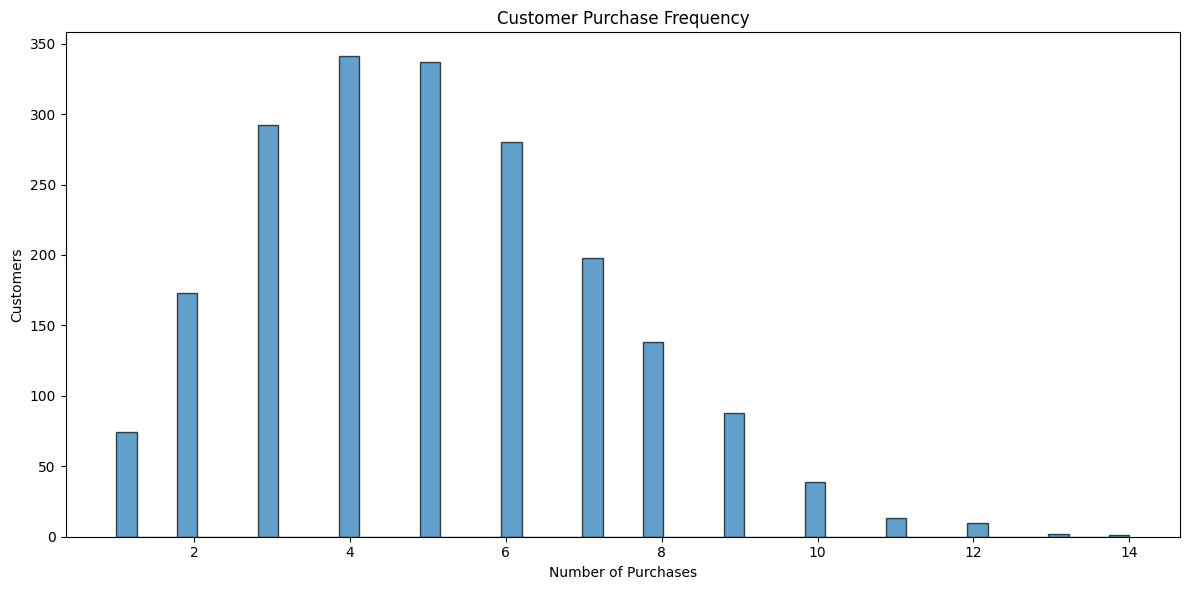

Saved: 13_customer_frequency.png


In [7]:
# ============================================================================
# 6. CUSTOMER BEHAVIOR ANALYSIS
# ============================================================================

import os
os.makedirs("../figures", exist_ok=True)

print("\n" + "=" * 80)
print("CUSTOMER BEHAVIOR ANALYSIS")
print("=" * 80)

if 'Customer_ID' in df.columns:
    customer_freq = df.groupby('Customer_ID').size()

    plt.figure(figsize=(12, 6))
    plt.hist(customer_freq, bins=50, edgecolor='black', alpha=0.7)
    plt.title('Customer Purchase Frequency')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Customers')
    plt.tight_layout()
    plt.savefig("../figures/13_customer_frequency.png", dpi=300)
    plt.show()

    print("Saved: 13_customer_frequency.png")




In [8]:
# ============================================================================
# 7. PRODUCT PERFORMANCE ANALYSIS
# ============================================================================

import os
os.makedirs("../figures", exist_ok=True)

print("\n" + "=" * 80)
print("PRODUCT PERFORMANCE ANALYSIS")
print("=" * 80)

if 'Product_ID' in df.columns and 'Sales' in df.columns:
    top_products = (
        df.groupby('Product_ID')['Sales']
        .sum()
        .sort_values(ascending=False)
        .head(20)
    )

    fig = px.bar(
        top_products.reset_index(),
        x='Product_ID',
        y='Sales',
        title='Top 20 Products by Revenue'
    )
    fig.write_html("../figures/15_top_products.html")
    print("Saved: 15_top_products.html")



PRODUCT PERFORMANCE ANALYSIS
Saved: 15_top_products.html


In [12]:
# ============================================================================
# 8. ADVANCED INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("ADVANCED INSIGHTS")
print("=" * 80)

if 'Discount' in df.columns and 'Sales' in df.columns:
    discount_bins = pd.cut(
        df['Discount'],
        bins=[-0.01, 0, 0.1, 0.2, 1],
        labels=['No Discount', '1–10%', '11–20%', '20%+']
    )

    discount_analysis = df.groupby(discount_bins)['Sales'].agg(['count', 'mean', 'sum'])
    print(discount_analysis)




ADVANCED INSIGHTS
             count        mean            sum
Discount                                     
No Discount   4032  106.860334  430860.864843
1–10%         2027  106.394636  215661.927523
11–20%        3442  109.536013  377022.955799
20%+           499  110.471405   55125.231311


In [9]:
# ============================================================================
# 9. KEY FINDINGS SUMMARY
# ============================================================================

import os
os.makedirs("../reports", exist_ok=True)

print("\n" + "=" * 80)
print("KEY FINDINGS FROM EDA")
print("=" * 80)

findings = []

if 'Product_Category' in df.columns:
    top_cat = df.groupby('Product_Category')['Sales'].sum().idxmax()
    findings.append(f"Top revenue category: {top_cat}")

if 'Customer_ID' in df.columns:
    repeat_rate = (df.groupby('Customer_ID').size() > 1).mean() * 100
    findings.append(f"Repeat customer rate: {repeat_rate:.2f}%")

for f in findings:
    print(f)

with open("../reports/03_eda_key_findings.txt", "w", encoding="utf-8") as file:
    file.write("KEY FINDINGS FROM EDA\n")
    file.write("=" * 80 + "\n")
    file.write("\n".join(findings))

print("Saved: 03_eda_key_findings.txt")



KEY FINDINGS FROM EDA
Top revenue category: Electronics
Repeat customer rate: 96.27%
Saved: 03_eda_key_findings.txt
